# Sentiment 140 Dataset Preprocessing

In this Jupyter notebook, I work with the Sentiment 140 dataset. I start by exploring and plotting some of its properties, and then attempt to prepare it for machine learning by converting all of its data into numerical values.

## Why I chose this work for this weekend

I chose to tackle the <i>first</i> and <i>second</i> learning objectives for this homework assignments, as I feel like I've already done quite a lot of thinking/writing about the ethics of the Boston Housing Dataset so far, and would like more practice with data analysis work. 

In terms of the <i>third</i> learning objective, I am interested in researching **facial recognition** and how it performs worse for certain groups of people (specifically, Black women). I've also seen a relatively recent news article about Google and Facebook miscategorizing videos of Black people as monkeys. I'd like to think more about the ethics of this and learn about **why** it occurs and **ways of combatting it**. 

In [1]:
from os import path
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Let's take a look at this dataset. Note that we are extracting the data from a `.csv` file located inside a `dataset` subdirectory, and we add some `column_names` when reading the data.

In [2]:
sentiment140_dataset_path = path.join('dataset','training.1600000.processed.noemoticon.csv')

with open(sentiment140_dataset_path, 'r') as f:
    column_names = ['Polarity','ID','Date','Query','User','Text']
    df = pd.read_csv(f, names=column_names)

df.head(20)

,Polarity,ID,Date,Query,User,Text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


The first thing that sticks out to me is this **Query** column, full of `NO_QUERY` strings. What is going on here? I'll first check if all of the values are indeed `NO_QUERY`.

In [3]:
print(set(df['Query']))

{'NO_QUERY'}


Looks like there aren't any other values. I guess I'll throw out this column now, I'm not entirely sure what it does.

In fact, for machine learning purposes, I feel like none of the columns other than **Polarity** and **Text** really matter, so I'll just throw everything out and keep those two.

Before I do that, though, I am a bit curious about when these tweets are coming from. I'll plot a histogram of the years first. Plus, it'll give me some more practice of working with dataframes and plotting

In [4]:
set(df['Date'].apply(lambda x: x.split(' ')[-1]))

{'2009'}

Oh... I guess they're all from `2009`. Let's get the months and dates instead.

In [5]:
set(df['Date'].apply(lambda x: x.split(' ')[1]+' '+x.split(' ')[2]))

{'Apr 06',
 'Apr 07',
 'Apr 17',
 'Apr 18',
 'Apr 19',
 'Apr 20',
 'Apr 21',
 'Jun 01',
 'Jun 02',
 'Jun 03',
 'Jun 04',
 'Jun 05',
 'Jun 06',
 'Jun 07',
 'Jun 14',
 'Jun 15',
 'Jun 16',
 'Jun 17',
 'Jun 18',
 'Jun 19',
 'Jun 20',
 'Jun 21',
 'Jun 22',
 'Jun 23',
 'Jun 24',
 'Jun 25',
 'May 01',
 'May 02',
 'May 03',
 'May 04',
 'May 09',
 'May 10',
 'May 11',
 'May 13',
 'May 14',
 'May 16',
 'May 17',
 'May 18',
 'May 21',
 'May 22',
 'May 23',
 'May 25',
 'May 26',
 'May 27',
 'May 28',
 'May 29',
 'May 30',
 'May 31'}

Cool, that's a more diverse selection. Let's try to plot a histogram of this now.

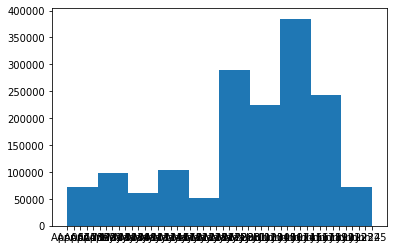

In [6]:
plt.hist(df['Date'].apply(lambda x: x.split(' ')[1]+' '+x.split(' ')[2]))
plt.show()

Looks like I need to figure out how to plot these dates correctly next time (not sure how to do the bins/x-axis), looks like I need to use `datetime` formats or something? I won't mess with that for now. Let's just get some counts for the months and call it a day:

In [7]:
df['Date'].apply(lambda x: x.split(' ')[1]).value_counts()

Jun    923608
May    576367
Apr    100025
Name: Date, dtype: int64

Most things are in June, cool. Back to the problem of preparing the data for machine learning. Let's extract only the **Polarity** and **Text** columns.

In [8]:
reduced_columns = ['Polarity','Text']
df_red = df[reduced_columns]

df_red.head(20)

,Polarity,Text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
5,0,@Kwesidei not the whole crew
6,0,Need a hug
7,0,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,@Tatiana_K nope they didn't have it
9,0,@twittera que me muera ?


Those `@` tag things look unnecessary for sentiment, so let's remove them. I'm sure the following code is inefficient, but it's the best I could think of.

In [9]:
def remove_starting_tags(text):
    kept_words = []
    for word in text.split(' '):
        if len(word) > 0:
            if word[0] != '@':
                kept_words.append(word)
    return ' '.join(kept_words)

# df_red['Text']=df_red['Text'].apply(lambda x: remove_starting_tags(x))

# df_red.head(20)

Ok, turns out there's a better way to do this, using **regular expressions**. Let's try this out!

Some of this code is taken from `https://www.kaggle.com/nitin194/twitter-sentiment-analysis-word2vec-doc2vec`.

In [10]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

df_red['No Tags Text'] = np.vectorize(remove_pattern)(df_red['Text'], "@[\w]*")
df_red['No Tags Text'] = df_red['No Tags Text'].str.replace("[^a-zA-Z#]", " ")

C:\Users\xzhou\AppData\Local\Temp/ipykernel_11592/2766772358.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_red['No Tags Text'] = np.vectorize(remove_pattern)(df_red['Text'], "@[\w]*")
C:\Users\xzhou\AppData\Local\Temp/ipykernel_11592/2766772358.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df_red['No Tags Text'] = df_red['No Tags Text'].str.replace("[^a-zA-Z#]", " ")
C:\Users\xzhou\AppData\Local\Temp/ipykernel_11592/2766772358.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

In the code above, I'd likely want to remove all the links and other expressions where letters are mixed with special characters. I'm not entirely sure how to do this right now, but will play around with it in the future.

Now, let's remove all words with length at most 2. This conveniently deletes any extra empty strings as well. There may be some problems with this, since the string "can't" will become "can", so I will think about how to address this in the future.

In [11]:
df_red['No Tags Text'] = df_red['No Tags Text'].apply(lambda x: ' '.join([w for w in x.split(' ') if len(w) > 2]))

display(df_red.head(20))

C:\Users\xzhou\AppData\Local\Temp/ipykernel_11592/529764455.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_red['No Tags Text'] = df_red['No Tags Text'].apply(lambda x: ' '.join([w for w in x.split(' ') if len(w) > 2]))


,Polarity,Text,No Tags Text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",http twitpic com Awww that bummer You shoulda ...
1,0,is upset that he can't update his Facebook by ...,upset that can update his Facebook texting and...
2,0,@Kenichan I dived many times for the ball. Man...,dived many times for the ball Managed save The...
3,0,my whole body feels itchy and like its on fire,whole body feels itchy and like its fire
4,0,"@nationwideclass no, it's not behaving at all....",not behaving all mad why here because can see ...
5,0,@Kwesidei not the whole crew,not the whole crew
6,0,Need a hug,Need hug
7,0,@LOLTrish hey long time no see! Yes.. Rains a...,hey long time see Yes Rains bit only bit LOL f...
8,0,@Tatiana_K nope they didn't have it,nope they didn have
9,0,@twittera que me muera ?,que muera


How long are these tweets in general?

(array([3.13500e+03, 5.32840e+04, 1.21093e+05, 1.52824e+05, 1.64145e+05,
        1.61086e+05, 1.48431e+05, 1.32990e+05, 1.17269e+05, 1.04689e+05,
        9.48670e+04, 8.86940e+04, 9.06580e+04, 1.46874e+05, 1.79270e+04,
        1.49100e+03, 2.18000e+02, 7.50000e+01, 4.70000e+01, 3.50000e+01]),
 array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
        130, 140, 150, 160, 170, 180, 190, 200]),
 <BarContainer object of 20 artists>)

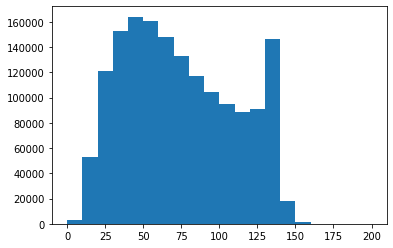

In [12]:
plt.hist(df_red['Text'].str.len(), bins=[10*i for i in range(21)])

In [13]:
write_path = path.join('dataset','reduced_dataset.csv')
df_red.to_csv(write_path, sep=',')